
# Solving nonlinear equations

In [1]:

using PyPlot


The test equation:

In [2]:

f(x) = exp(-x) - x

f (generic function with 1 method)


Let's plot a graph of f(x)

In [3]:

xmin = -1.0
xmax = 3.0
np = 100
x = range(xmin, xmax, np)
y = f.(x);

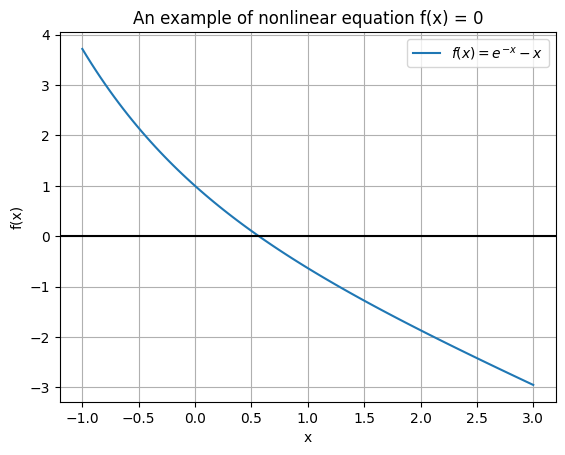

In [4]:

plot(x, y, label=L"f(x) = e^{-x} - x")
axhline(color="black")
grid(true)
xlabel("x")
ylabel("f(x)")
title("An example of nonlinear equation f(x) = 0")
legend();


By visual inspection: the root of nonlinear equation is on the interval (0.0, 1.0)


## Bracketing methods. Bisection algorithm.

For a function $f(x)$ (univariate, real-valued) a bracket is a pair $a,b$,
$a<b$ for which $f(a)f(b)<0$. That is the function values have different signs at 
a and b. If $f(x)$ is a continuous function this ensures there will be a zero in 
the interval $[a,b]$. If $f(x)$ is not continuous, then there must be a point 
$c \in [a,b]$ where the function "jumps" over 0.

Such values can be found, up to floating point round off. That is, given `f(a) * f(b) < 0`, 
a value $c$ with $a < c < b$ can be found where either `f(c) == 0.0` or `f(prevfloat(c)) * f(c) < 0` 
or `f(c) * f(nextfloat(c)) < 0`.

In [22]:

"""
    rt, ni = mybisection(f, a, b, abstol)

Solve nonlinear equation f(x) = 0 using bisection. a and b are the endpoints of the initial bracketing interval. 
abstol is the acceptble error of the solution.

mybisection() return the approximation for the root of the equation f(x) = 0 and the number of required function calls.
"""
function mybisection(f, a, b, abstol)
    fa = f(a)
    fb = f(b)
    sa = sign(fa)
    sb = sign(fb)
    if sa == sb
        error("The provided interval [$a,$b] does not contain a root of the equation f(x)=0")
    end
    ni = 0
    while abs(b - a) > abstol
        ni += 1
        m = a + (b - a)/2
        fm = f(m)
        sm = sign(fm)
        if sm == sb
            b = m
            sb = sm
        else
            a = m
            sa = sm
        end
    end
    return a, ni
end

mybisection

In [23]:

xb, nb = mybisection(f, 0.0, 1.0, eps()/2)

(0.5671432904097838, 53)

In [24]:

f(xb) ≈ 0.0

true


Bracketing methods have **guaranteed convergence**, but in general may require many more 
function calls than other types of root finding algorithms.


## Non-bracketing methods. Newton's method

If a good initial guess is known, then different types of iterative algorithms 
are more efficient. However, unlike bracketing methods, these algorithms may 
not converge to the desired root or not converge at all.

In [25]:

"""
    rt, ni = mynewtons(f, fp, xin, abstol, itmax)

Solve nonlinear equation f(x) = 0 using Newton's method. fp(x) = f'(x). xin is initial approximaption to the root. 
abstol is the acceptble error of the solution. itmax is the maximal number of iterations.

mynewtons() return the approximation for the root of the equation and the number of iterations.
"""
function mynewtons(f, fp, xin, abstol, itmax)
    x = xin
    fx = f(x)
    fpx = fp(x)
    delta = - fx/fpx
    ni = 0
    while abs(delta) > abstol
        ni += 1
        if ni == itmax
            break
        end
        x += delta
        fx = f(x)
        fpx = fp(x)
        delta = - fx/fpx
    end
    return x, ni
end

mynewtons

In [26]:

fp(x) = -exp(-x) - 1.0

fp (generic function with 1 method)

In [27]:

itmax = 55;

In [28]:

xn, nn = mynewtons(f, fp, 1.0, eps()/2, itmax)

(0.5671432904097838, 4)

In [29]:

xn ≈ xb

true

In [30]:

f(xn) ≈ 0.0

true


### An example of a nonlinear equation where Newton's method always fails:


$$f(x) = \mathrm{sign}(x - 1) \, \sqrt{|x - 1|}$$
$$\frac{\mathrm{d}f}{\mathrm{d}x} = \frac{1}{2 \, \sqrt{|x - 1|}}$$

In [31]:

ff(x) = sign(x - 1.0) * sqrt(abs(x - 1.0))

ff (generic function with 1 method)

In [32]:

umin = -3.0
umax = 5.0
npf = 500
u = range(umin, umax, npf);

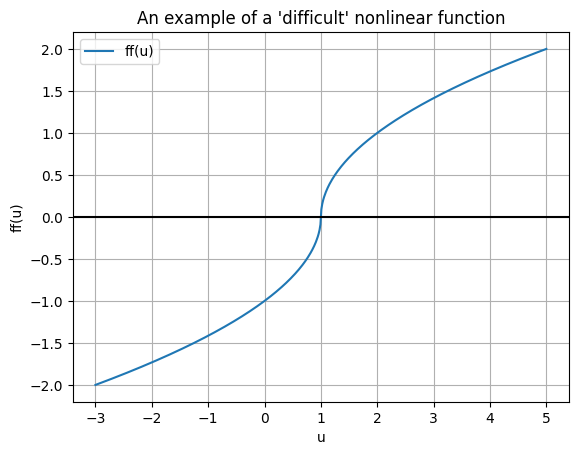

In [16]:

plot(u, ff.(u), label="ff(u)")
axhline(color="black")  # yzero axis
grid(true)
xlabel("u")
ylabel("ff(u)")
title("An example of a 'difficult' nonlinear function")
legend();

There is an isolated zero at u = 1.0

In [17]:

ffp(x) = 1/(2*sqrt(abs(x - 1.0)))

ffp (generic function with 1 method)

In [18]:

uf, nf = mynewtons(ff, ffp, 1.1, eps(), itmax)

(1.1, 55)

In [19]:

uf, nf = mynewtons(ff, ffp, 1.01, eps(), itmax)

(1.01, 55)

In [20]:

uf, nf = mynewtons(ff, ffp, 11.0, eps(), itmax)

(11.0, 55)


Bisection method has no troubles finding the root:

In [21]:

xf, nf = mybisection(ff, 0.0, 2.0, eps())

(1.0, 53)


### An example of a nonlinear equation where Newton's method 'sometimes' fails:


$$f(x) = \frac{x - 1}{(x - 1)^2 + 1}$$
$$\frac{\mathrm{d}f}{\mathrm{d}x} = \frac{1 - (x - 1)^2}{((x - 1)^2 + 1)^2}$$

In [ ]:

ffs(x) = (x - 1.0)/((x-1.0)^2 + 1.0)

In [ ]:

plot(u, ffs.(u), label="ffs(u)")
plot([umin, umax], [0.0, 0.0], linewidth=2, color="black")  # yzero axis
grid(true)
xlabel("u")
ylabel("ffs(u)")
title("An example of a 'difficult' nonlinear function")
legend();


There is an isolated zero at u = 1.0

In [ ]:

ffsp(x) = (1.0 - (x - 1.0)^2) /((x-1.0)^2 + 1.0)^2

In [ ]:

ufs, nfs = mynewtons(ffs, ffsp, 3.0, eps(), itmax)

In [ ]:

ufs, nfs = mynewtons(ffs, ffsp, -1.0, eps(), itmax)

In [ ]:

ufs, nfs = mynewtons(ffs, ffsp, 0.5, eps(), itmax)

Bisection method has no troubles finding the root:

In [ ]:

xfs, nfs = mybisection(ffs, 0.0, 2.0, eps())


## Julia package `Roots` for solving nonlinear equations

In [ ]:

using Roots


A test function with several roots:

In [ ]:

f2(x) = x^5 - x + 1/4

In [ ]:

np = 50
s = range(-1.2, 1.2, np)

In [ ]:

plot(s, f2.(s))
axhline(color="black")
title("Test function")
xlabel("x")
ylabel("f(x)")
grid(true)


#### The solver uses a bracketing algorithm when the initial data is passed as a tuple:

In [ ]:

r1 = find_zero(f2, (-1.2,  -1.0), verbose=true)    # optional keyword `verbose`

In [ ]:

scatter(r1, f2(r1), marker="o", label="root")
plot(s, f2.(s))
axhline(color="black")
title("The result of bisection algorithm")
xlabel("x")
ylabel("f(x)")
legend()
grid(true)


#### Passing just an initial guess will dispatch to a non-bracketing method.

In [ ]:

r2_0 = 0.6
r2 = find_zero(f2,  r2_0, verbose=true)

r3_0 = 1.1
r3 = find_zero(f2,  r3_0);

In [ ]:

scatter([r2_0, r2], [f2(r2_0),f2(r2)], marker="o")
scatter([r3_0, r3], [f2(r3_0),f2(r3)], marker="o")

plot(s, f2.(s))
axhline(color="black")
title("The results of a non-bracketing algorithm")
xlabel("x")
ylabel("f(x)")
grid(true)


#### It is possible to find all zeros in a given interval:

In [ ]:

zs = find_zeros(f2, -1.2, 1.2)
scatter(zs, f2.(zs), marker="o", label="all roots in the interval [-1.2,1.2]")

plot(s, f2.(s))
axhline(color="black")
title("Finding multiple zeros at once")
xlabel("x")
ylabel("f(x)")
legend()
grid(true)


#### Functions can have parameters

The values of parameters can be passed to `find_zero`.


The following is a function that has a root $x = 0$ when $p = 0$.

We use (-1/2, 1/2) as a bracket:

In [ ]:

fp(x, p) = x^5 - x + p

p = 0.0

r = find_zero(fp, (-1/2, 1/2), p)     # <= passing the value of a parameter to the solver

plot(s, fp.(s, p))
scatter(r, fp(r, p), marker="o", label="root")
axhline(color="black")
title("Finding a root of a parameter-dependent function")
xlabel("x")
ylabel("f(x)")
legend()
grid(true)